In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
df = pd.read_csv("BTC-USD.csv")
df = df.dropna()
len(df)

2583

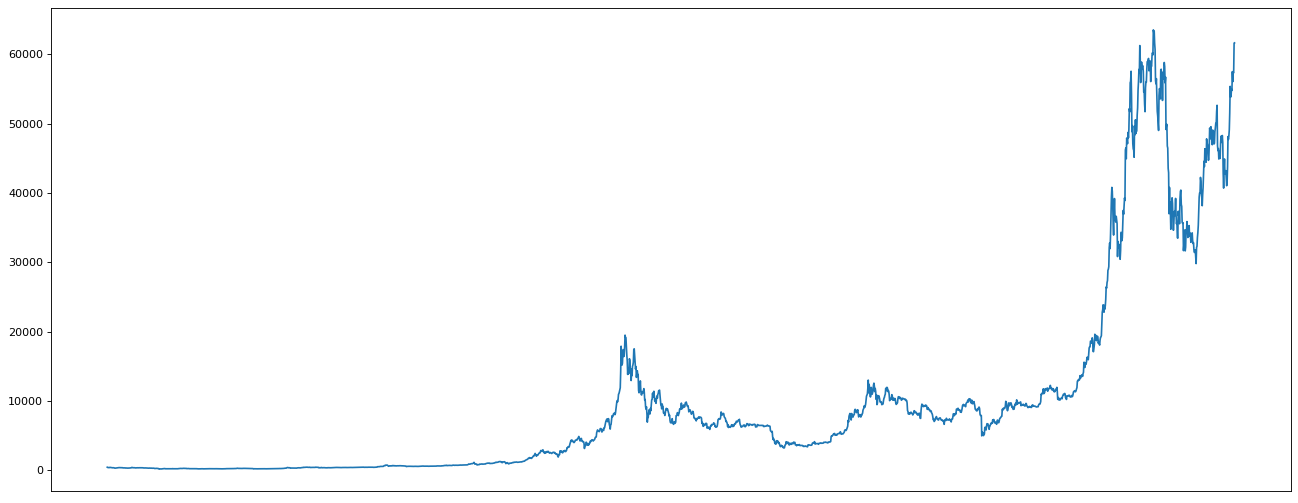

In [3]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
figure(figsize=(20, 8), dpi=80)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(df['Date'], df['Close'])
plt.xticks(rotation=90)
plt.show()

In [6]:
from prophet import Prophet


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [5]:
df_new = df.rename(columns={'Date': 'ds'})
df_new = df_new.rename(columns={'Open': 'y'})

In [7]:
df_new

ds             y          High           Low         Close  \
0     2014-09-17    465.864014    468.174011    452.421997    457.334015   
1     2014-09-18    456.859985    456.859985    413.104004    424.440002   
2     2014-09-19    424.102997    427.834991    384.532013    394.795990   
3     2014-09-20    394.673004    423.295990    389.882996    408.903992   
4     2014-09-21    408.084991    412.425995    393.181000    398.821014   
...          ...           ...           ...           ...           ...   
2582  2021-10-12  57526.832031  57627.878906  54477.972656  56041.058594   
2583  2021-10-13  56038.257813  57688.660156  54370.972656  57401.097656   
2584  2021-10-14  57372.832031  58478.734375  56957.074219  57321.523438   
2585  2021-10-15  57345.902344  62757.128906  56868.144531  61593.949219   
2586  2021-10-16  61495.410156  62232.257813  61110.839844  61628.851563   

         Adj Close        Volume  
0       457.334015  2.105680e+07  
1       424.440002  3.448320e+07  
2       394.795990  3.791970e+07  
3       408.903992  3.686360e+07  
4       398.821014  2.658010e+07  
...            ...           ...  
2582  56041.058594  4.108376e+10  
2583  57401.097656  4.168425e+10  
2584  57321.523438  3.661579e+10  
2585  61593.949219  5.178008e+10  
2586  61628.851563  4.469134e+10  

[2583 rows x 7 columns]

In [8]:
future = m.make_future_dataframe(periods=365)
future.tail()

ds
2943 2022-10-12
2944 2022-10-13
2945 2022-10-14
2946 2022-10-15
2947 2022-10-16

In [14]:
forecast = m.predict(future)
a=forecast[['ds', 'yhat']]

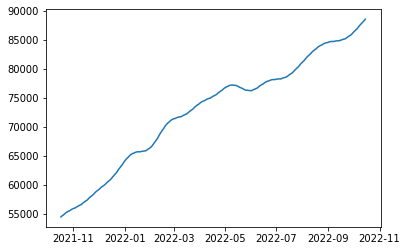

In [17]:
plt.plot(a["ds"][2583:2947], a["yhat"][2583:2947])
plt.show()

In [12]:
forecast

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0    2014-09-17    208.742377  -7932.801769   3539.565877    208.742377   
1    2014-09-18    209.008390  -7899.500919   3387.824231    209.008390   
2    2014-09-19    209.274404  -7649.332234   3320.422225    209.274404   
3    2014-09-20    209.540418  -7753.984024   3389.509419    209.540418   
4    2014-09-21    209.806431  -7473.352683   3704.774894    209.806431   
...         ...           ...           ...           ...           ...   
2943 2022-10-12  89684.218388  80214.430535  96986.545522  83889.738435   
2944 2022-10-13  89778.515434  80227.517378  96668.800470  83965.237585   
2945 2022-10-14  89872.812480  80439.124964  96767.277455  84034.893956   
2946 2022-10-15  89967.109526  80662.323935  96855.460826  84099.733280   
2947 2022-10-16  90061.406572  80869.551801  97400.256727  84164.572605   

       trend_upper  additive_terms  additive_terms_lower  \
0       208.742377    -2355.694190          -2355.694190   
1       209.008390    -2364.203360          -2364.203360   
2       209.274404    -2392.258061          -2392.258061   
3       209.540418    -2407.023547          -2407.023547   
4       209.806431    -2447.957738          -2447.957738   
...            ...             ...                   ...   
2943  95560.691231    -1630.027164          -1630.027164   
2944  95667.163363    -1526.662396          -1526.662396   
2945  95769.501965    -1452.990307          -1452.990307   
2946  95895.179963    -1377.219879          -1377.219879   
2947  96026.442788    -1339.701232          -1339.701232   

      additive_terms_upper     weekly  weekly_lower  weekly_upper  \
0             -2355.694190 -46.676449    -46.676449    -46.676449   
1             -2364.203360  -7.120602     -7.120602     -7.120602   
2             -2392.258061   6.311281      6.311281      6.311281   
3             -2407.023547  26.006659     26.006659     26.006659   
4             -2447.957738  12.139352     12.139352     12.139352   
...                    ...        ...           ...           ...   
2943          -1630.027164 -46.676449    -46.676449    -46.676449   
2944          -1526.662396  -7.120602     -7.120602     -7.120602   
2945          -1452.990307   6.311281      6.311281      6.311281   
2946          -1377.219879  26.006659     26.006659     26.006659   
2947          -1339.701232  12.139352     12.139352     12.139352   

           yearly  yearly_lower  yearly_upper  multiplicative_terms  \
0    -2309.017741  -2309.017741  -2309.017741                   0.0   
1    -2357.082758  -2357.082758  -2357.082758                   0.0   
2    -2398.569342  -2398.569342  -2398.569342                   0.0   
3    -2433.030206  -2433.030206  -2433.030206                   0.0   
4    -2460.097089  -2460.097089  -2460.097089                   0.0   
...           ...           ...           ...                   ...   
2943 -1583.350715  -1583.350715  -1583.350715                   0.0   
2944 -1519.541794  -1519.541794  -1519.541794                   0.0   
2945 -1459.301588  -1459.301588  -1459.301588                   0.0   
2946 -1403.226538  -1403.226538  -1403.226538                   0.0   
2947 -1351.840583  -1351.840583  -1351.840583                   0.0   

      multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                            0.0                         0.0  -2146.951813  
1                            0.0                         0.0  -2155.194970  
2                            0.0                         0.0  -2182.983657  
3                            0.0                         0.0  -2197.483129  
4                            0.0                         0.0  -2238.151307  
...                          ...                         ...           ...  
2943                         0.0                         0.0  88054.191224  
2944                         0.0                         0.0  88251.853038  
2945            

In [18]:
df_2020=df_new[]

SyntaxError: invalid syntax (<ipython-input-18-37f0eda9442f>, line 1)

In [49]:
df_2020=df_new[0:2218]
df_2021=df_new[2218:2586]

In [73]:

m=Prophet(daily_seasonality=True)
m.fit(df_2020)

In [74]:
future = m.make_future_dataframe(periods=30)

In [75]:
forecast = m.predict(future)

In [76]:
pre=forecast[["ds","yhat"]]
forlist=list(pre.yhat)[2218:2248]
tr=list(df_2021.y)[0:30]

len(tr)

30

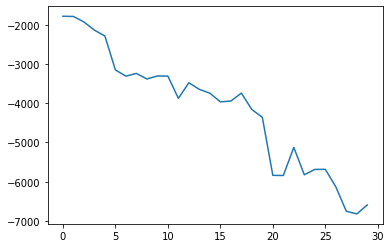

In [77]:
diff=[]
for i in range(len(forlist)):
    diff.append(forlist[i]-tr[i])
diff
plt.plot(diff)

In [57]:
year=list(df_2021.ds)

In [61]:
forlist

[9573.905054889772,
 9601.684839050025,
 9599.47076831286,
 9641.755451918621,
 9658.256789849731,
 9681.874793365982,
 9692.250909270248,
 9721.983005123986,
 9755.265605662471,
 9754.854652216076,
 9795.05593116511,
 9805.489977954807,
 9819.055127431371,
 9815.490713768944,
 9827.593403440716,
 9839.856143139787,
 9815.428955958292,
 9829.100765751336,
 9811.055163078987,
 9794.821961841548,
 9760.826796236151,
 9742.592050390347,
 9725.35896673272,
 9673.03057686335,
 9661.135081222394,
 9620.563061669789,
 9585.50085876947,
 9536.96284508436,
 9508.976354421216,
 9487.189553658087,
 9435.802302116823,
 9430.51997515713,
 9402.283925448324,
 9385.201133337077,
 9360.075920647647,
 9360.597549414884,
 9371.953969563787,
 9357.771653268943,
 9393.081302685137,
 9408.062835918527,
 9435.991861785624,
 9456.790112918168,
 9503.23320020594,
 9559.58545211397,
 9588.561247153597,
 9664.31208168459,
 9716.192232769688,
 9776.724695434403,
 9825.169360950997,
 9893.746338111165,
 9966.2837

In [78]:
pre

ds         yhat
0    2014-09-17   736.538973
1    2014-09-18   718.284773
2    2014-09-19   686.794529
3    2014-09-20   674.915992
4    2014-09-21   667.555253
...         ...          ...
2243 2020-11-11  9606.342280
2244 2020-11-12  9572.208257
2245 2020-11-13  9524.593005
2246 2020-11-14  9497.366613
2247 2020-11-15  9476.460613

[2248 rows x 2 columns]

In [96]:
df_new[2240:2586]

ds             y          High           Low         Close  \
2244  2020-11-08  14833.753906  15637.320313  14744.110352  15479.567383   
2245  2020-11-09  15479.595703  15785.136719  14865.529297  15332.315430   
2246  2020-11-10  15332.350586  15450.329102  15124.959961  15290.902344   
2247  2020-11-11  15290.909180  15916.260742  15290.006836  15701.339844   
2248  2020-11-12  15701.298828  16305.003906  15534.771484  16276.343750   
...          ...           ...           ...           ...           ...   
2582  2021-10-12  57526.832031  57627.878906  54477.972656  56041.058594   
2583  2021-10-13  56038.257813  57688.660156  54370.972656  57401.097656   
2584  2021-10-14  57372.832031  58478.734375  56957.074219  57321.523438   
2585  2021-10-15  57345.902344  62757.128906  56868.144531  61593.949219   
2586  2021-10-16  61495.410156  62232.257813  61110.839844  61628.851563   

         Adj Close        Volume  
2244  15479.567383  2.663208e+10  
2245  15332.315430  3.414912e+10  
2246  15290.902344  2.557494e+10  
2247  15701.339844  2.977237e+10  
2248  16276.343750  3.417576e+10  
...            ...           ...  
2582  56041.058594  4.108376e+10  
2583  57401.097656  4.168425e+10  
2584  57321.523438  3.661579e+10  
2585  61593.949219  5.178008e+10  
2586  61628.851563  4.469134e+10  

[343 rows x 7 columns]

In [89]:
df_2021

ds             y          High           Low         Close  \
2222  2020-10-17  11322.123047  11386.261719  11285.345703  11358.101563   
2223  2020-10-18  11355.982422  11483.359375  11347.578125  11483.359375   
2224  2020-10-19  11495.038086  11799.092773  11408.290039  11742.037109   
2225  2020-10-20  11745.974609  11999.917969  11681.480469  11916.334961   
2226  2020-10-21  11913.077148  13184.566406  11900.928711  12823.689453   
...          ...           ...           ...           ...           ...   
2582  2021-10-12  57526.832031  57627.878906  54477.972656  56041.058594   
2583  2021-10-13  56038.257813  57688.660156  54370.972656  57401.097656   
2584  2021-10-14  57372.832031  58478.734375  56957.074219  57321.523438   
2585  2021-10-15  57345.902344  62757.128906  56868.144531  61593.949219   
2586  2021-10-16  61495.410156  62232.257813  61110.839844  61628.851563   

         Adj Close        Volume  
2222  11358.101563  1.913043e+10  
2223  11483.359375  1.828331e+10  
2224  11742.037109  2.386077e+10  
2225  11916.334961  3.091582e+10  
2226  12823.689453  4.341471e+10  
...            ...           ...  
2582  56041.058594  4.108376e+10  
2583  57401.097656  4.168425e+10  
2584  57321.523438  3.661579e+10  
2585  61593.949219  5.178008e+10  
2586  61628.851563  4.469134e+10  

[365 rows x 7 columns]

In [93]:
pre[2218:2586]

ds         yhat
2218 2020-10-17  9537.859267
2219 2020-10-18  9566.287486
2220 2020-10-19  9564.614284
2221 2020-10-20  9607.592923
2222 2020-10-21  9625.035956
2223 2020-10-22  9649.396426
2224 2020-10-23  9660.549057
2225 2020-10-24  9690.935447
2226 2020-10-25  9725.033717
2227 2020-10-26  9725.334616
2228 2020-10-27  9766.401646
2229 2020-10-28  9777.947126
2230 2020-10-29  9792.419662
2231 2020-10-30  9789.789265
2232 2020-10-31  9802.693925
2233 2020-11-01  9815.908019
2234 2020-11-02  9792.314477
2235 2020-11-03  9806.958340
2236 2020-11-04  9790.113694
2237 2020-11-05  9774.859672
2238 2020-11-06  9741.851967
2239 2020-11-07  9724.454018
2240 2020-11-08  9708.188561
2241 2020-11-09  9656.691930
2242 2020-11-10  9645.749145
2243 2020-11-11  9606.342280
2244 2020-11-12  9572.208257
2245 2020-11-13  9524.593005
2246 2020-11-14  9497.366613
2247 2020-11-15  9476.460613

In [101]:
m = Prophet(daily_seasonality=True)
m.fit(df_2020)

In [102]:
future = m.make_future_dataframe(periods=365)

In [103]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat   yhat_lower    yhat_upper
2578 2021-10-12  10320.162230  3934.499838  16362.635328
2579 2021-10-13  10316.565518  4016.862538  16453.593646
2580 2021-10-14  10322.148417  4065.334753  16570.902672
2581 2021-10-15  10317.325244  3904.612236  16797.582608
2582 2021-10-16  10335.033173  3908.563817  16569.835930

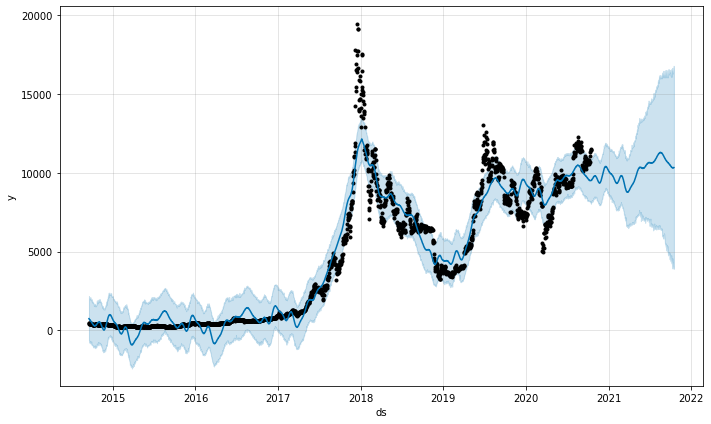

In [104]:
fig1 = m.plot(forecast)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


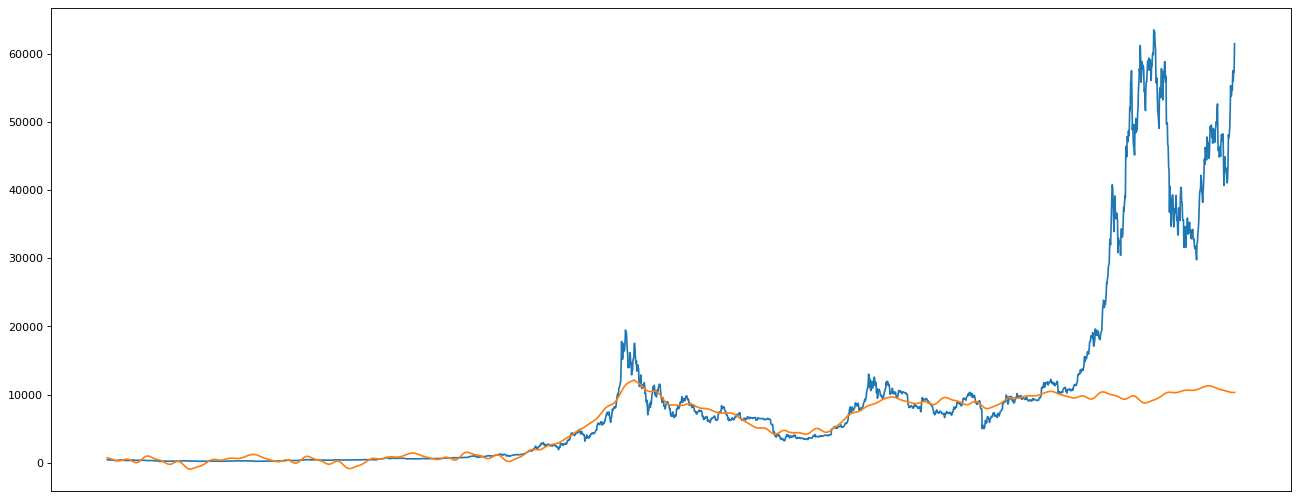

In [114]:
figure(figsize=(20, 8), dpi=80)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)
plt.plot(df_new['ds'], df_new['y'])
plt.plot(forecast["yhat"])
plt.show()

In [137]:
def predict_certain_period(a):
    lent=len(df_new)-1
    train=df_new[0:lent-a]
    actual=df_new[lent-a:lent]
    m = Prophet(daily_seasonality=True)
    m.fit(train)
    future = m.make_future_dataframe(periods=a)
    forecast = m.predict(future)
    figure(figsize=(20, 8), dpi=80)
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    plt.plot(actual["ds"], actual['y'])
    plt.plot(range(a),forecast["yhat_upper"][lent-a:lent])
    plt.plot(range(a),forecast["yhat_lower"][lent-a:lent])
    plt.show()
    

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


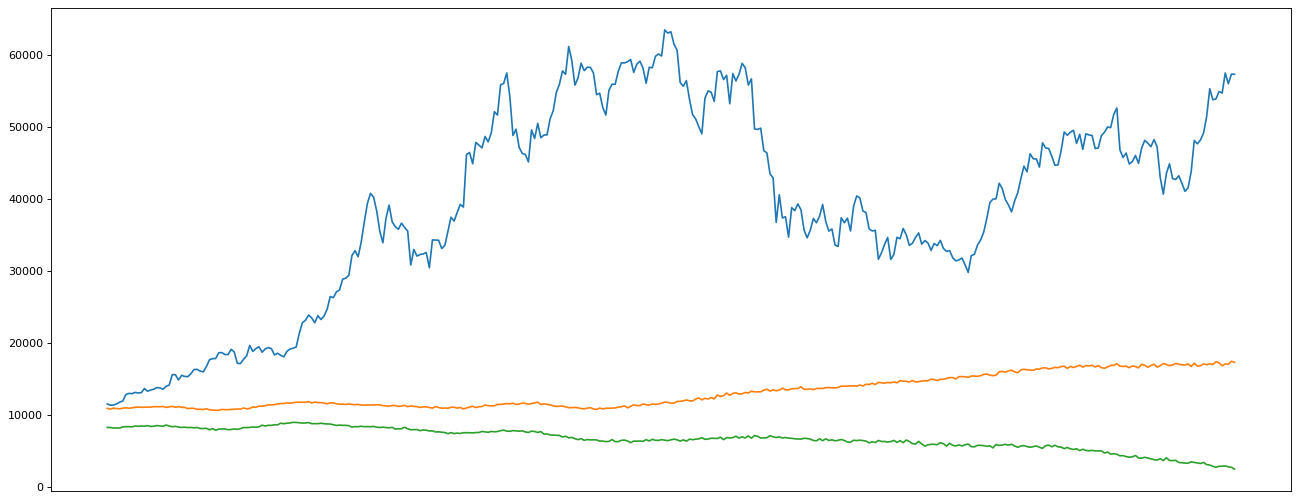

In [139]:
predict_certain_period(365)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 60, 50)            11200     
_________________________________________________________________
dropout_8 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 60, 60)            26640     
_________________________________________________________________
dropout_9 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 60, 80)            45120     
_________________________________________________________________
dropout_10 (Dropout)         (None, 60, 80)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 120)              

Epoch 1/20
34/34 [==============================] - 8s 112ms/step - loss: 0.0150 - val_loss: 0.0044
Epoch 2/20
34/34 [==============================] - 3s 86ms/step - loss: 0.0047 - val_loss: 0.0048
Epoch 3/20
34/34 [==============================] - 3s 98ms/step - loss: 0.0039 - val_loss: 0.0025
Epoch 4/20
34/34 [==============================] - 3s 86ms/step - loss: 0.0031 - val_loss: 0.0035
Epoch 5/20
34/34 [==============================] - 3s 85ms/step - loss: 0.0036 - val_loss: 0.0054
Epoch 6/20
34/34 [==============================] - 3s 94ms/step - loss: 0.0046 - val_loss: 0.0022
Epoch 7/20
34/34 [==============================] - 3s 85ms/step - loss: 0.0036 - val_loss: 0.0022
Epoch 8/20
34/34 [==============================] - 4s 106ms/step - loss: 0.0029 - val_loss: 0.0019
Epoch 9/20
34/34 [==============================] - 3s 89ms/step - loss: 0.0029 - val_loss: 0.0091
Epoch 10/20
34/34 [==============================] - 3s 86ms/step - loss: 0.0027 - val_loss: 0.0044
Epoch 1

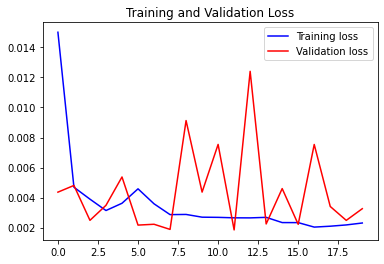

[[0.4706426  0.46111744 0.48280998 0.47344448 0.47088353]
 [0.47401087 0.46123417 0.47704822 0.46881889 0.4684344 ]
 [0.4693899  0.46753509 0.47971984 0.47799406 0.58014293]
 [0.478582   0.4651387  0.48320055 0.47436634 0.58077161]
 [0.47484393 0.46341911 0.48580538 0.4753163  0.51281761]
 [0.47544133 0.46066417 0.48029786 0.47048598 0.50320533]
 [0.47093199 0.45584878 0.45759783 0.44653683 0.53940623]
 [0.44730892 0.4366841  0.45853541 0.44698722 0.3896405 ]
 [0.44746543 0.44734994 0.45922675 0.45951067 0.45636559]
 [0.46013085 0.44621564 0.45361296 0.44409923 0.4492168 ]
 [0.44473277 0.43476986 0.45280559 0.44709489 0.45019814]
 [0.4474418  0.4339183  0.45685948 0.44671188 0.38891156]
 [0.44743679 0.43342032 0.45318448 0.44152702 0.42303552]
 [0.44193241 0.42858715 0.4421377  0.43034118 0.48317139]
 [0.43081561 0.42160048 0.44155958 0.43338314 0.36562176]
 [0.43383675 0.428432   0.44299524 0.43479183 0.4138093 ]
 [0.43510676 0.42468356 0.43090146 0.420884   0.47835128]
 [0.42117614 0

  2.05482645e-04]]
*
[[8.25015741e-03 7.17568450e-03 8.27960383e-03 9.04986353e-03
  1.08252608e-03]
 [9.11196745e-03 8.60254042e-03 9.36982727e-03 9.67545559e-03
  1.72343341e-03]
 [9.73060497e-03 8.21722456e-03 9.65042697e-03 9.49615357e-03
  8.37057247e-04]
 [9.55831477e-03 7.82099427e-03 9.80933998e-03 9.53430191e-03
  1.64759643e-04]
 [9.62277377e-03 8.43687385e-03 9.81960575e-03 1.03754298e-02
  2.58054918e-04]
 [1.04163423e-02 9.33201689e-03 1.04978629e-02 1.09895821e-02
  6.49821461e-04]
 [1.11299059e-02 1.00600840e-02 1.16906242e-02 1.15308023e-02
  7.22329513e-04]
 [1.16098814e-02 9.58360965e-03 1.15545784e-02 1.12152118e-02
  4.29104387e-04]
 [1.12763401e-02 9.41155468e-03 1.07198006e-02 1.05828384e-02
  4.67306314e-04]
 [1.06668758e-02 8.74098922e-03 1.08431348e-02 1.06450558e-02
  1.70424854e-04]
 [1.07300918e-02 9.22797730e-03 1.10336404e-02 1.10427923e-02
  1.22001156e-04]
 [1.11072109e-02 9.16665121e-03 1.14317767e-02 1.09446523e-02
  0.00000000e+00]
 [1.10023858e-02 8.

  9.71576635e-04]]
*
[[7.40394390e-03 5.63347068e-03 7.05870855e-03 6.89947446e-03
  7.37440438e-04]
 [6.95801091e-03 5.37307147e-03 7.19363767e-03 7.23318178e-03
  3.97086520e-04]
 [7.29170872e-03 5.96631303e-03 7.68692047e-03 7.86017182e-03
  3.31312419e-04]
 [7.90956822e-03 5.93129745e-03 7.83897447e-03 7.38846693e-03
  2.06054709e-04]
 [7.47042379e-03 6.15708330e-03 7.91991933e-03 7.96007152e-03
  3.63649578e-04]
 [8.03776198e-03 6.26625237e-03 8.40799051e-03 8.09910375e-03
  2.36356383e-04]
 [8.16046387e-03 6.18847559e-03 7.96948735e-03 7.47599652e-03
  2.03498158e-04]
 [7.53353712e-03 5.58119981e-03 7.73553090e-03 7.29348465e-03
  8.80063407e-05]
 [7.37114432e-03 6.02160226e-03 7.71792726e-03 7.75499289e-03
  2.32726657e-04]
 [7.80800851e-03 5.89517645e-03 7.50534968e-03 7.13069462e-03
  2.05558033e-04]
 [7.21610940e-03 5.44828427e-03 7.42280775e-03 7.20191911e-03
  1.27761711e-04]
 [7.29595772e-03 5.46030720e-03 7.48817130e-03 6.96541977e-03
  1.41639816e-04]
 [7.03780860e-03 5.

 [0.00252315 0.00077018 0.00276132 0.00246929 0.00028874]]
*
[[0.0043246  0.00324843 0.00461654 0.00505024 0.0007661 ]
 [0.00508573 0.00372611 0.0051403  0.00536246 0.00098774]
 [0.00544554 0.00364708 0.00513844 0.00491679 0.00078644]
 [0.00496619 0.00351839 0.0049599  0.00507653 0.00078466]
 [0.00511444 0.00331419 0.00523891 0.00489769 0.00051008]
 [0.00494313 0.00332656 0.00524518 0.00508083 0.00026411]
 [0.0051576  0.00332676 0.00537453 0.00498212 0.00035817]
 [0.0050736  0.0040735  0.00544515 0.00577164 0.00118102]
 [0.00585344 0.00444291 0.00628812 0.00588308 0.00137154]
 [0.00593961 0.00430944 0.00632881 0.00612217 0.00062194]
 [0.00617807 0.0042942  0.00643012 0.00601735 0.00059137]
 [0.00607397 0.0041639  0.00605379 0.00555062 0.00056557]
 [0.0055726  0.00375358 0.00582186 0.00537194 0.00037024]
 [0.00541627 0.00376299 0.00582292 0.00560528 0.00013427]
 [0.005637   0.00414448 0.0060723  0.00582268 0.00034593]
 [0.00589142 0.00405659 0.00600258 0.00555931 0.00034551]
 [0.0056049

 [0.00524351 0.00344861 0.00534676 0.00524703 0.00048064]]
*
[[0.00284954 0.00115469 0.00320871 0.00289426 0.00021252]
 [0.0029597  0.00123312 0.0033147  0.00296289 0.00020387]
 [0.00302732 0.00147093 0.00337985 0.00322191 0.00046759]
 [0.00328459 0.00147374 0.00357297 0.00314551 0.00019269]
 [0.00321671 0.00152169 0.00357935 0.00325322 0.00012402]
 [0.0033178  0.00147354 0.00346372 0.0030543  0.00018868]
 [0.00311971 0.00133373 0.00341347 0.00305461 0.00023305]
 [0.00311769 0.00135356 0.00346681 0.00306326 0.00028653]
 [0.00312764 0.00131271 0.00346452 0.00306973 0.0001755 ]
 [0.00313386 0.00129751 0.00341554 0.00305358 0.00019713]
 [0.00311909 0.00127593 0.00321956 0.00285942 0.00018146]
 [0.00291405 0.00108269 0.00308638 0.00269611 0.00019548]
 [0.00276368 0.00100527 0.00264783 0.00232012 0.00044736]
 [0.0023834  0.00073878 0.00270755 0.00246903 0.00032249]
 [0.00253066 0.00078849 0.00278791 0.00247271 0.00026248]
 [0.00253253 0.00074708 0.00279451 0.00239248 0.00019542]
 [0.0024486

 [0.00319365 0.00137026 0.00353302 0.00311378 0.00015708]]
*
[[0.00527719 0.00345425 0.00557668 0.00525288 0.00081087]
 [0.00532906 0.0034309  0.00474403 0.00429074 0.00116671]
 [0.00436393 0.00278066 0.00473116 0.00450223 0.00039634]
 [0.00458995 0.00278212 0.00484433 0.0044705  0.00033403]
 [0.00453109 0.00295086 0.004924   0.00477673 0.0004328 ]
 [0.00485525 0.0029653  0.00499713 0.00456916 0.00046343]
 [0.00462648 0.00274188 0.00485736 0.00445032 0.00048273]
 [0.0045202  0.00280396 0.00478487 0.00453314 0.00046955]
 [0.00459259 0.00276376 0.00477519 0.00431941 0.00029726]
 [0.00440279 0.0025511  0.00454889 0.00416185 0.00052777]
 [0.00422786 0.00245376 0.00455294 0.00413436 0.00034819]
 [0.00419863 0.00232738 0.00210444 0.00170689 0.00080339]
 [0.00252729 0.00129183 0.00272601 0.00251464 0.00121851]
 [0.00259092 0.00128961 0.00294582 0.0029632  0.00058449]
 [0.00302908 0.00124268 0.00320243 0.00281925 0.00038269]
 [0.00288954 0.00116847 0.00272271 0.00270646 0.0003834 ]
 [0.0027710

 [0.0135002  0.01166946 0.01404094 0.0133788  0.00099614]]
*
[[0.0054173  0.00414182 0.0058468  0.00546485 0.00088254]
 [0.00553042 0.00370116 0.00579707 0.0055487  0.00058081]
 [0.00561089 0.00425013 0.0060363  0.00598805 0.00089617]
 [0.00605247 0.0047592  0.00649873 0.00654863 0.00099543]
 [0.00660281 0.00535481 0.00693059 0.00702676 0.00129893]
 [0.00710123 0.0061597  0.00757502 0.0077597  0.00160512]
 [0.00785615 0.00608967 0.00732564 0.00704285 0.00094642]
 [0.00715626 0.00582278 0.00746552 0.00762595 0.00068928]
 [0.00772298 0.00772888 0.00806799 0.00947685 0.00212869]
 [0.00958479 0.0103721  0.00989954 0.01166264 0.00444009]
 [0.01175025 0.01427918 0.01111751 0.01208429 0.00572032]
 [0.01197892 0.01186431 0.01080016 0.01077943 0.00323528]
 [0.01094104 0.00926209 0.00970691 0.01016429 0.0025892 ]
 [0.01022711 0.00899797 0.01068592 0.01078605 0.00112441]
 [0.01074574 0.0089632  0.01048739 0.01010725 0.00101781]
 [0.01022996 0.00873093 0.01017865 0.01046384 0.0013816 ]
 [0.0105232

 [0.01279943 0.01074806 0.01318441 0.01260646 0.00209689]]
*
[[0.01327391 0.01119123 0.01373034 0.01314007 0.00063433]
 [0.01321106 0.01107421 0.01355297 0.0129923  0.00062368]
 [0.01311546 0.01242801 0.01369849 0.01449043 0.00181038]
 [0.01454181 0.0126377  0.01470159 0.01424105 0.00113256]
 [0.01432651 0.01222044 0.0146458  0.0139502  0.00058456]
 [0.01405992 0.01190194 0.01429808 0.01396987 0.00066699]
 [0.01408375 0.01202031 0.01448444 0.01399249 0.00076576]
 [0.01405702 0.01189555 0.01405019 0.01333315 0.00243221]
 [0.01335661 0.01124174 0.01345203 0.01316135 0.00372448]
 [0.01323345 0.01114806 0.01363296 0.01305446 0.00084326]
 [0.0131281  0.01099366 0.01025502 0.00963948 0.00326911]
 [0.00975061 0.00899651 0.00975419 0.01084061 0.00253743]
 [0.01089466 0.00901703 0.01109326 0.01056954 0.00087373]
 [0.01061387 0.0088731  0.010911   0.01082156 0.00107516]
 [0.01088813 0.00885429 0.01103369 0.01045825 0.00090699]
 [0.0105106  0.01074272 0.01090749 0.01253291 0.00256776]
 [0.0125776

 [0.01419599 0.01221722 0.01485721 0.01421506 0.00099093]]
*
[[0.01229624 0.01031092 0.01290732 0.01233663 0.00198105]
 [0.01240956 0.01038372 0.01294901 0.01235692 0.00134961]
 [0.01243547 0.01036133 0.01299832 0.01236629 0.00131422]
 [0.01248734 0.01052791 0.01310346 0.01255315 0.00172094]
 [0.01262507 0.01050527 0.01247844 0.01197999 0.00219569]
 [0.01204048 0.01002416 0.01253657 0.01202637 0.00116427]
 [0.01209934 0.01020734 0.01270522 0.01219775 0.00088766]
 [0.01225567 0.01014662 0.01270416 0.01217456 0.00123594]
 [0.01224085 0.010396   0.0128185  0.01242209 0.00135031]
 [0.01250144 0.01044092 0.01307554 0.0124196  0.00123126]
 [0.01251506 0.01041134 0.01297566 0.01233435 0.00138431]
 [0.01241578 0.01038115 0.01297949 0.01237488 0.00103427]
 [0.01246019 0.01042678 0.01301677 0.01241463 0.00085889]
 [0.01250035 0.01092031 0.01309399 0.01287117 0.00144823]
 [0.01293602 0.01082271 0.01339087 0.01274001 0.00138821]
 [0.01281974 0.01078981 0.01282648 0.01234067 0.00154096]
 [0.0124326

 [0.02477934 0.02244096 0.02570263 0.02478812 0.00121484]]
*
[[0.01835389 0.01666975 0.01883389 0.01857298 0.00177711]
 [0.01863412 0.0165325  0.01922969 0.01862744 0.00120762]
 [0.01869459 0.01825739 0.01943402 0.02024354 0.00257441]
 [0.0203539  0.01903687 0.02088691 0.02042642 0.00197364]
 [0.0205406  0.01866841 0.02114964 0.02054288 0.001396  ]
 [0.02060765 0.01885264 0.02143811 0.02108948 0.00146839]
 [0.02116949 0.01904326 0.02106114 0.02062673 0.00225844]
 [0.02074056 0.01866997 0.02135982 0.02088803 0.00164859]
 [0.0210015  0.01863797 0.02124394 0.02052492 0.00144982]
 [0.02067164 0.01848322 0.0213702  0.02067192 0.00135427]
 [0.02081864 0.01989132 0.02165468 0.02218631 0.00169496]
 [0.02242547 0.02380171 0.02316325 0.02560554 0.00601267]
 [0.02563653 0.02536933 0.02621857 0.02724079 0.00526345]
 [0.0273387  0.02479078 0.02612906 0.02626679 0.00400843]
 [0.02636357 0.0243782  0.02664798 0.02672799 0.00206895]
 [0.02692516 0.02827305 0.02792238 0.0304465  0.00589181]
 [0.0306540

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




*
[[0.521294   0.50696445 0.45955214 0.46546398 0.22069902]
 [0.46455402 0.44928452 0.4055282  0.44787586 0.28206289]
 [0.44951896 0.46379706 0.42973442 0.46569018 0.16092915]
 [0.46628572 0.45897347 0.41801211 0.41921332 0.15671095]
 [0.41938356 0.41017249 0.35022677 0.3507978  0.20575195]
 [0.35623023 0.38430678 0.31255002 0.39214143 0.31028696]
 [0.39269553 0.41743055 0.37576101 0.38527265 0.20317965]
 [0.38660035 0.41992884 0.39709157 0.4186222  0.20711471]
 [0.41945091 0.42889441 0.41022009 0.44302219 0.15030893]
 [0.44267712 0.44829191 0.432066   0.43706545 0.17239638]
 [0.43729079 0.42281457 0.41268731 0.4116023  0.1356164 ]
 [0.41269355 0.44141823 0.42387354 0.45283569 0.13859313]
 [0.45338444 0.44003725 0.4405723  0.43584435 0.12618244]
 [0.43645085 0.46821367 0.44825793 0.48223943 0.17525359]
 [0.48248457 0.50424778 0.49057445 0.51701142 0.20081291]
 [0.51602948 0.50874034 0.51340323 0.52050534 0.16164688]
 [0.51974988 0.54976209 0.53066575 0.56599352 0.19190689]
 [0.5672085

 [0.32816231 0.33049858 0.33373968 0.33938692 0.08943019]]
*
[[0.44934641 0.44200435 0.45103577 0.45123158 0.16724315]
 [0.45329842 0.44220907 0.45781462 0.44641152 0.14687388]
 [0.44652757 0.44004128 0.45830387 0.45305876 0.15342136]
 [0.45377929 0.47898327 0.46569756 0.49274033 0.2366503 ]
 [0.49350644 0.47962269 0.45889051 0.44865178 0.24561486]
 [0.45030658 0.45628898 0.45502136 0.47120796 0.19877341]
 [0.47224096 0.46101598 0.46884711 0.45596621 0.16763649]
 [0.45403473 0.4628583  0.46591881 0.47467448 0.17294006]
 [0.4751313  0.46886518 0.47983816 0.47832884 0.19616677]
 [0.47926107 0.46613087 0.47840748 0.4690878  0.19219602]
 [0.47021182 0.45499957 0.46374143 0.46279668 0.17088994]
 [0.46260154 0.45503175 0.47034105 0.46884815 0.16745622]
 [0.46930504 0.48228955 0.47954248 0.49514002 0.2261957 ]
 [0.49321988 0.48132715 0.50069965 0.49290906 0.18208311]
 [0.49346758 0.49064934 0.50650524 0.50105587 0.16953561]
 [0.50098247 0.48942381 0.49427979 0.4905301  0.16000875]
 [0.4906378

 [0.33903756 0.33092569 0.34726333 0.34085541 0.07331926]]
*
[[0.30966853 0.29977353 0.30323163 0.29635327 0.07676052]
 [0.29645378 0.3043642  0.30124787 0.31265096 0.08781223]
 [0.31283244 0.31461962 0.32137649 0.32226312 0.10062004]
 [0.32306411 0.31297655 0.32536901 0.32132208 0.10603912]
 [0.32144224 0.32560453 0.32624177 0.3331424  0.09736215]
 [0.33264911 0.32497619 0.33379657 0.32876386 0.10346816]
 [0.33027643 0.33003472 0.3339407  0.33228159 0.09247876]
 [0.33280714 0.32890882 0.33905648 0.33443437 0.1107172 ]
 [0.33482694 0.32646381 0.33835977 0.3362129  0.09552245]
 [0.33638247 0.33466666 0.34078977 0.34570756 0.08769804]
 [0.34618043 0.33576942 0.34976405 0.34140874 0.07495142]
 [0.34189419 0.33339334 0.34850677 0.33974564 0.08231109]
 [0.34003553 0.32982445 0.3270406  0.31843017 0.08972354]
 [0.31887164 0.31358578 0.32755915 0.32178225 0.08068647]
 [0.32229203 0.31117801 0.31723874 0.31319499 0.08346498]
 [0.31391072 0.30682378 0.3202075  0.31367325 0.08424614]
 [0.3145568

 [0.32174019 0.3131994  0.33047576 0.32253332 0.08202706]]
*
[[0.32008778 0.31813622 0.32882334 0.32812824 0.09323752]
 [0.32843903 0.32118945 0.33424438 0.32789013 0.09025104]
 [0.3281276  0.31945984 0.3362324  0.32946836 0.071184  ]
 [0.32954116 0.31858497 0.3344534  0.32812152 0.0724574 ]
 [0.32836907 0.31837769 0.32367935 0.31590679 0.08658273]
 [0.31628808 0.31052803 0.32411493 0.3205705  0.09255415]
 [0.32100026 0.31376186 0.32106375 0.3219805  0.09812513]
 [0.3223993  0.3178268  0.33104165 0.32825039 0.09627967]
 [0.32835923 0.33116215 0.33638185 0.33939367 0.14470181]
 [0.33981996 0.33217989 0.34278735 0.33872231 0.09986172]
 [0.33879763 0.32974444 0.34611775 0.33813481 0.09294018]
 [0.33825097 0.32709871 0.34087804 0.33217084 0.09249251]
 [0.33301079 0.32156878 0.33029226 0.32446145 0.10466263]
 [0.32519428 0.32067681 0.33114482 0.32697343 0.09825728]
 [0.32739647 0.32702526 0.33471135 0.33638113 0.10201583]
 [0.33690271 0.33069426 0.3418045  0.33469265 0.111054  ]
 [0.3350554

 [0.17608173 0.17150322 0.17913551 0.17736018 0.11768803]]
*
[[0.19192194 0.19666379 0.1815468  0.19834401 0.15121403]
 [0.19888037 0.19597306 0.18467722 0.18639533 0.14348141]
 [0.18597186 0.18368866 0.18558614 0.18854811 0.1328787 ]
 [0.18890052 0.2099971  0.19417325 0.21115245 0.16129478]
 [0.21203833 0.21136151 0.21136744 0.21226153 0.14406783]
 [0.21307904 0.20683151 0.20057408 0.1987218  0.13397176]
 [0.19936715 0.20614736 0.20200413 0.20893974 0.1190559 ]
 [0.20850078 0.20575203 0.20951734 0.20506827 0.11655886]
 [0.20573328 0.1984301  0.19512931 0.19234798 0.11272011]
 [0.1922077  0.1943877  0.19471999 0.1955967  0.11135643]
 [0.19596956 0.18905036 0.19053146 0.1850943  0.11744098]
 [0.18535651 0.18429267 0.17814524 0.17303936 0.13020936]
 [0.17284367 0.16606201 0.16533461 0.16780291 0.15143522]
 [0.16814496 0.16573265 0.16907994 0.17071075 0.11749737]
 [0.17080403 0.1747511  0.17537926 0.17786006 0.10956714]
 [0.17799712 0.17284072 0.17543512 0.17208457 0.11119899]
 [0.1720645

[[0.169857   0.16432927 0.17446677 0.17020569 0.11577951]
 [0.17058973 0.16387366 0.17162824 0.16748357 0.1214258 ]
 [0.16778323 0.16180364 0.17139706 0.16674357 0.11084408]
 [0.16708096 0.1752697  0.17122714 0.18057993 0.17139112]
 [0.18108225 0.17448123 0.18481759 0.18080888 0.13642891]
 [0.18116596 0.17524063 0.18452086 0.18179156 0.13916558]
 [0.18232725 0.17526965 0.18459042 0.17963012 0.13905027]
 [0.17958818 0.17391    0.18332831 0.17989399 0.14355867]
 [0.18015049 0.17396834 0.1832586  0.17878329 0.14263892]
 [0.17898805 0.17278659 0.18275077 0.17799705 0.13891696]
 [0.17827289 0.172864   0.18277783 0.17820047 0.13494595]
 [0.17816417 0.17311786 0.18315351 0.17866512 0.13146016]
 [0.17910149 0.17451121 0.18336156 0.18094515 0.15595624]
 [0.18107106 0.18739667 0.18606333 0.19346518 0.21956412]
 [0.19352211 0.1911303  0.19873024 0.19508947 0.22012754]
 [0.1953369  0.19060744 0.19969254 0.19781866 0.19262737]
 [0.1981128  0.19108654 0.20042974 0.19545303 0.17226707]
 [0.19563337 0

 [0.51811372 0.55065989 0.52841259 0.544719   0.66495368]]
*
[[0.27408953 0.26817101 0.26644356 0.26048632 0.33978782]
 [0.26081314 0.26019184 0.26623241 0.26404921 0.37264437]
 [0.2643971  0.25652513 0.26922492 0.26347687 0.29058565]
 [0.26399684 0.25730401 0.27039752 0.26434896 0.28412703]
 [0.26467625 0.25655154 0.26831292 0.26239306 0.30442642]
 [0.26275218 0.25916671 0.26872256 0.26774388 0.30760767]
 [0.26809904 0.26192094 0.27528846 0.27043397 0.30318556]
 [0.27076801 0.26716606 0.27776532 0.27574402 0.32458105]
 [0.27611181 0.2844531  0.28287017 0.28935765 0.41496543]
 [0.28977323 0.28551018 0.29112794 0.29261232 0.38939993]
 [0.29297889 0.28284227 0.29445546 0.2907769  0.32822563]
 [0.29093862 0.28128746 0.29156502 0.28824569 0.34880977]
 [0.28855018 0.29060568 0.29622973 0.29252609 0.39956911]
 [0.29393299 0.29069637 0.2990655  0.30044335 0.33957322]
 [0.30081602 0.30040888 0.30904288 0.31038529 0.37203544]
 [0.31084282 0.31306548 0.31857362 0.32096126 0.43046649]
 [0.3214053

 [0.52746876 0.51190655 0.5393716  0.52639647 0.26690837]]
*
[[0.54288364 0.52850567 0.53493264 0.53586987 0.45945887]
 [0.53624405 0.54519215 0.54672078 0.54810672 0.44791091]
 [0.54928676 0.5347896  0.54344055 0.53940898 0.37970587]
 [0.5399297  0.52522608 0.53095941 0.52615803 0.36205246]
 [0.52696522 0.50987975 0.5165291  0.50326181 0.39570009]
 [0.50318057 0.48784699 0.50220724 0.49866321 0.38565166]
 [0.49910605 0.50019562 0.51069811 0.50383503 0.3506896 ]
 [0.50449653 0.48823541 0.50772115 0.50168495 0.32128289]
 [0.50232221 0.50085297 0.49142228 0.48136195 0.37277079]
 [0.48265591 0.47108151 0.48295405 0.48525354 0.30449729]
 [0.48558622 0.47641944 0.49468921 0.4835084  0.3056671 ]
 [0.48424678 0.47743122 0.4927952  0.48807783 0.30651779]
 [0.48848131 0.49674314 0.50134518 0.5128305  0.3686402 ]
 [0.51301076 0.51491927 0.51857269 0.5290858  0.38047655]
 [0.5298304  0.52553608 0.54245207 0.53521987 0.38765521]
 [0.53590512 0.54006666 0.54949851 0.55093223 0.34028453]
 [0.5515720

 [0.38211714 0.37343538 0.38848805 0.38232458 0.34155334]]
*
[[0.43569136 0.4281297  0.43316755 0.4215295  0.43455755]
 [0.42172178 0.41270816 0.43301646 0.42229552 0.32210167]
 [0.42282222 0.41551268 0.43106309 0.42149063 0.30604051]
 [0.42198951 0.41144878 0.43146295 0.42426923 0.33582116]
 [0.4247164  0.4124804  0.42606879 0.41550508 0.33735165]
 [0.41597066 0.40272542 0.41555871 0.40733489 0.3562261 ]
 [0.40784262 0.39860106 0.41640184 0.41025344 0.31723271]
 [0.41059517 0.39878127 0.41114837 0.40348799 0.34691222]
 [0.40400775 0.39597484 0.4134147  0.40428269 0.30580857]
 [0.40525152 0.40599578 0.41366267 0.41636996 0.34364517]
 [0.41702981 0.40674417 0.42679791 0.41749022 0.35172723]
 [0.41797739 0.40674201 0.42031194 0.40892275 0.37245079]
 [0.40931504 0.39649655 0.38812807 0.3797534  0.48640915]
 [0.37996101 0.36831703 0.38694025 0.37865693 0.36059556]
 [0.37897521 0.42660836 0.3886951  0.43907379 0.63634737]
 [0.4399566  0.49352922 0.45159269 0.46931674 0.98648603]
 [0.4697059

1932

[array([6963.3477], dtype=float32),
 array([6900.587], dtype=float32),
 array([6735.3345], dtype=float32),
 array([6472.6436], dtype=float32),
 array([6133.9287], dtype=float32),
 array([5749.316], dtype=float32),
 array([5345.918], dtype=float32),
 array([4945.8813], dtype=float32),
 array([4563.2544], dtype=float32),
 array([4205.667], dtype=float32),
 array([3877.5833], dtype=float32),
 array([3580.9136], dtype=float32),
 array([3313.169], dtype=float32),
 array([3069.8623], dtype=float32),
 array([2845.0361], dtype=float32),
 array([2632.154], dtype=float32),
 array([2424.363], dtype=float32),
 array([2216.7346], dtype=float32),
 array([2010.1765], dtype=float32),
 array([1803.9222], dtype=float32),
 array([1606.2529], dtype=float32),
 array([1426.9236], dtype=float32),
 array([1268.1536], dtype=float32),
 array([1127.4739], dtype=float32),
 array([1004.18823], dtype=float32),
 array([900.0815], dtype=float32),
 array([813.65826], dtype=float32),
 array([742.6782], dtype=float32),


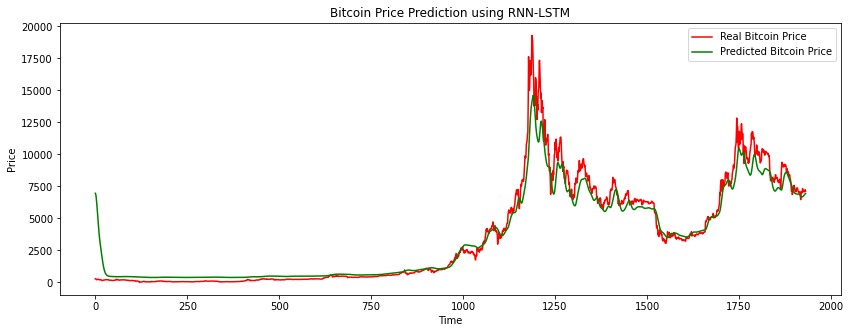

In [197]:
#CNN
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
data = pd.read_csv("BTC-USD.csv")
data = data.dropna()
data_training = data[data['Date']< '2020-01-01'].copy()
data_test = data[data['Date']< '2020-01-01'].copy()
training_data = data_training.drop(['Date', 'Adj Close'], axis = 1)
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
X_train = [] 
Y_train = []
training_data.shape[0]
for i in range(60, training_data.shape[0]):
    X_train.append(training_data[i-60:i])
    Y_train.append(training_data[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

model = keras.Sequential()
model.add(keras.layers.Input(shape=(X_train.shape[1], 5)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10))
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='Adam',metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 300)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               38528     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 39,818
Trainable params: 39,818
Non-trainable params: 0
_________________________________________________________________


In [198]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [199]:
history= model.fit(X_train, Y_train, epochs = 20, batch_size =50, validation_split=0.1)

Epoch 1/20
34/34 [==============================] - 1s 7ms/step - loss: 0.0120 - val_loss: 0.0171
Epoch 2/20
34/34 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0046
Epoch 3/20
34/34 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0045
Epoch 4/20
34/34 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0085
Epoch 5/20
34/34 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0029
Epoch 6/20
34/34 [==============================] - 0s 2ms/step - loss: 8.6369e-04 - val_loss: 0.0030
Epoch 7/20
34/34 [==============================] - 0s 2ms/step - loss: 7.3154e-04 - val_loss: 0.0034
Epoch 8/20
34/34 [==============================] - 0s 2ms/step - loss: 6.2189e-04 - val_loss: 0.0023
Epoch 9/20
34/34 [==============================] - 0s 1ms/step - loss: 6.3640e-04 - val_loss: 0.0035
Epoch 10/20
34/34 [==============================] - 0s 2ms/step - loss: 5.1566e-04 - val_loss: 0.0023

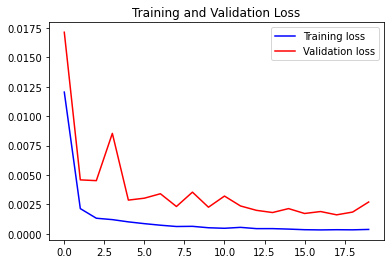

In [201]:
part_60_days = data_training.tail(60)
df= part_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)

In [202]:
inputs = scaler.transform(df)

In [210]:
X_test1 =[]
Y_test1 =[]
for i in range (60, inputs.shape[0]):
    X_test1.append(inputs[i-60:i]) 
    Y_test1.append(inputs[i, 0])
X_test1, Y_test1 = np.array(X_test1), np.array(Y_test1) 
Y_pred1 = model.predict(X_test1) 

In [216]:
scale = 1/5.18164146e-05
Y_t1=[]
for i in Y_test:
    Y_t1.append(i*scale)
Y_p1=[]
for j in Y_pred:
    Y_p1.append(j[0]*scale)

Y_p1

[6830.050866441386,
 3562.3621601052255,
 2093.9678005577307,
 1036.6518670128555,
 564.6218713929455,
 -774.1829796080659,
 -342.9210266967703,
 1470.4515350086506,
 86.81259417076421,
 345.5039271722442,
 1599.6309960174708,
 1419.2504838842679,
 3093.742852696155,
 4254.134751130371,
 4476.594976402784,
 4009.41383695083,
 3709.784584660468,
 2753.2171190321424,
 3040.0023610308153,
 1768.5884112515298,
 1096.8281674756977,
 1801.646719092049,
 1495.9618335769317,
 589.5348385039325,
 1325.4947877308175,
 930.7636237802553,
 1619.940625035564,
 512.685883658803,
 1.61799062558331,
 173.07253901707523,
 -48.08870961248096,
 -71.23110676926332,
 -279.15809538496364,
 -920.9838084745844,
 -883.4226344327968,
 -2382.7639182692897,
 -2982.244431580846,
 -3345.782290439119,
 -4511.4089361885535,
 -4926.620477452458,
 -5299.181035701764,
 -3172.632159801982,
 -2943.557972352856,
 -2625.435277753694,
 -3648.1463912142217,
 -3110.3981087258317,
 -4313.13414650133,
 -3166.762156934419,
 -3016

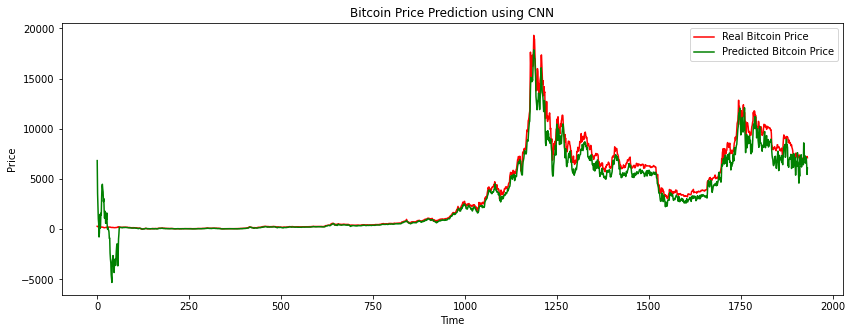

In [218]:
plt.figure(figsize=(14,5))
plt.plot(Y_t1, color = 'red', label = 'Real Bitcoin Price')
plt.plot(Y_p1, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using CNN')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [221]:
from datetime import datetime
data = pd.read_csv("BTC-USD.csv")
data = data.dropna()
data = data.reset_index()
# data.head()
mean = data['Open'].mean()
std = data['Open'].std()
data['Open'] = (data['Open'] - mean)/std
data.head()
# for i in range(len(data)):
#     data['Date'][i] = datetime.strptime(data['Date'][i], '%y/%m/%d')

index        Date      Open        High         Low       Close  \
0      0  2014-09-17 -0.648547  468.174011  452.421997  457.334015   
1      1  2014-09-18 -0.649201  456.859985  413.104004  424.440002   
2      2  2014-09-19 -0.651579  427.834991  384.532013  394.795990   
3      3  2014-09-20 -0.653715  423.295990  389.882996  408.903992   
4      4  2014-09-21 -0.652742  412.425995  393.181000  398.821014   

    Adj Close      Volume  
0  457.334015  21056800.0  
1  424.440002  34483200.0  
2  394.795990  37919700.0  
3  408.903992  36863600.0  
4  398.821014  26580100.0

In [222]:
df_new = data.rename(columns={'Date': 'ds'})
df_new = df_new.rename(columns={'Open': 'y'})

In [223]:
m = Prophet(daily_seasonality=True)
m.fit(df_new)